# STA 141B: Homework 3

Fall 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:

Last Name: 

Student ID: 

## Instructions

### New item: Please print your answer notebook to pdf (make sure that it is not too many pages, > 10, due to long output) and submit as the homework solution with your zip file.

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

### Introduction

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `hw3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import os
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

def read_fresh_data(direct):
    """The function extracts the fresh row from each files in the directory and return as a dataframe
    Args:
        direct(str): the directory where stores files 
    Returns:
        df(pd.dataframe): the dataframe of fresh row
    """
    #get the directory where files located and list all files  
    wd=os.path.join('hw3_data',direct)
    files=os.listdir(wd)
    #create a empty list to store fresh rows 
    pre_df=[]
    
    #read in each excel files and extract fresh rows
    for file in files:  
        raw_data=pd.read_excel(os.path.join(wd,file),header=1)
        #fill na values with whitespace 
        raw_data=raw_data.fillna(" ")   
        #clean the fresh rows and append them into pre_df
        for idx,line in enumerate(raw_data["Form"]):
            if "Fresh" in line:
                #select desired columns and combine
                pre_df.append([direct,file[:-5]]+raw_data.iloc[idx,[0,1,3,4,6]].tolist())
    #turn the pre_df list into a dataframe
    df=pd.DataFrame(pre_df,columns=['type','food','form','price_per_lb','yield','lb_per_cup','price_per_cup'])
    return df
#extract fresh rows fro fruit
fruit=read_fresh_data('fruit')
fruit

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,nectarines,Fresh1,1.761148,0.91,0.319670,0.618667
1,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.393800
2,fruit,grapes,Fresh1,2.093827,0.96,0.330693,0.721266
3,fruit,blueberries,Fresh1,4.734622,0.95,0.319670,1.593177
4,fruit,pineapple,Fresh1,0.627662,0.51,0.363763,0.447686
5,fruit,watermelon,Fresh1,0.333412,0.52,0.330693,0.212033
6,fruit,apricots,Fresh1,3.040072,0.93,0.363763,1.189102
7,fruit,apples,Fresh1,1.567515,0.90,0.242508,0.422373
8,fruit,honeydew,Fresh1,0.796656,0.46,0.374786,0.649077
9,fruit,grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278


__Exercise 2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [2]:
#extract fresh rows for veg
veg=read_fresh_data('vegetables')
veg

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,vegetables,mustard_greens,Fresh1,2.56924,0.84,0.308647,0.944032
1,vegetables,radish,Fresh1,1.31163,0.9,0.275578,0.401618
2,vegetables,mushrooms,Fresh1,,,,
3,vegetables,turnip_greens,Fresh1,2.47175,0.75,0.31967,1.05353
4,vegetables,celery,Fresh1,,,,
5,vegetables,lettuce_romaine,Fresh1,,,,
6,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.15536
7,vegetables,butternut_squash,Fresh1,1.24474,0.714,0.451948,0.787893
8,vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.58227
9,vegetables,kale,Fresh1,2.8073,1.05,0.286601,0.766262


The price for tomatoes doesn't show up . Since there are different types of tomatoes, there are multiple prices for fresh tomatoes. Thus, the prices are not on the same line as the key word "Fresh".  There are total 8 files have this problem.

__Exercise 3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [3]:
#combine fruit and vegetables
all_data=pd.concat([fruit,veg])
#replace withspace with NA and drop rows with NA
all_data.replace(r'^\s*$', np.nan, regex=True, inplace= True)
all_data.dropna(inplace=True)
#reset index and ouptu resutl
all_data.reset_index(inplace=True)



__Exercise 4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

__4.1__
From the following bar chart, we can see that the most expensive(per pound) fruit is raspberries, and the least expensive fruit is watermelon.

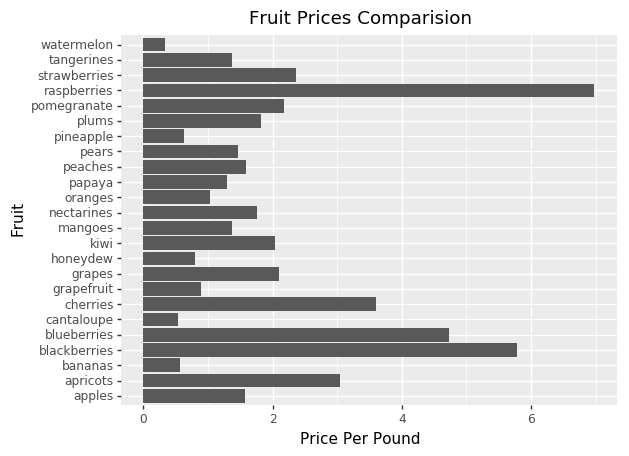

<ggplot: (-9223363282810823385)>

In [4]:
#plot a bar chart for fruit's per pound prices comparision
ggplot(fruit,aes("food","price_per_lb"))+ geom_bar(stat = "identity")+coord_flip() \
    +labs(title='Fruit Prices Comparision',x="Fruit",y="Price Per Pound")

__4.2__ From the following histogram and box plot we can see that the distribution of fruit's price is right-skewed and there are three fruits have unusual higher price than other fruits. The distribution of vegetable's price is kind of bimodal and it has a smaller variance than the distribution of fruit's price. Also, the two distribution have a similar median. 

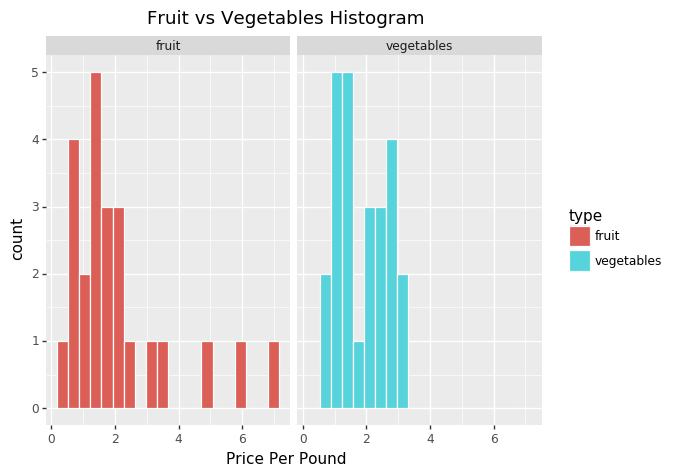

<ggplot: (-9223363282810823189)>

In [5]:
#create histogram for price distribution
ggplot(all_data,aes("price_per_lb",fill="type"))+geom_histogram(bins=20,color="white")+facet_wrap("type") \
    +labs(title="Fruit vs Vegetables Histogram",x="Price Per Pound")

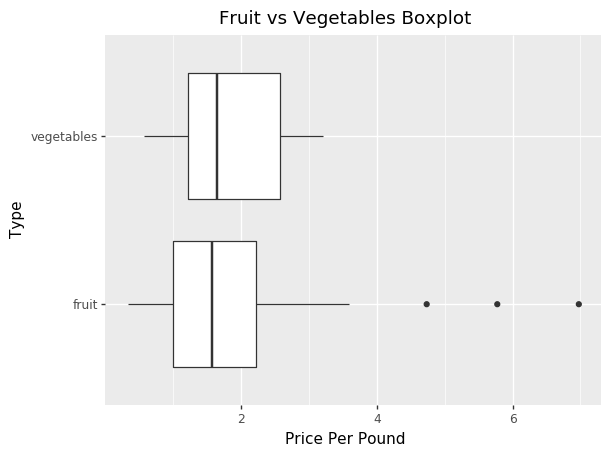

<ggplot: (8754028380252)>

In [6]:
#create boxplot for price distribution
ggplot(all_data,aes("type","price_per_lb"))+geom_boxplot()+coord_flip() \
    +labs(title="Fruit vs Vegetables Boxplot", y= "Price Per Pound",x="Type")

__4.3__ The food has the best value for the price is the food has largest preparation yield factor. Thus, It is  collard green.

In [7]:
#get the food has largest yield
print(all_data["food"][all_data["yield"].idxmax()])

collard_greens


__4.4__ Something surprising about this data set is that many vegetables are more expensive than fruits; However, berries are a lot more expensive than other food.

__4.5__ To get the food has best combination of price and yield, we can first calculate the value of "price_per_lb" divided by "yield". This value tells us the actual price we need to pay to get one pound of edible portion of the food. Thus, the smaller this value is, the better the combination is. From the following bar plot we can see that watermelon has best combination of price and yield.

watermelon


Text(0.5, 0, 'Actual Value Per Pound')

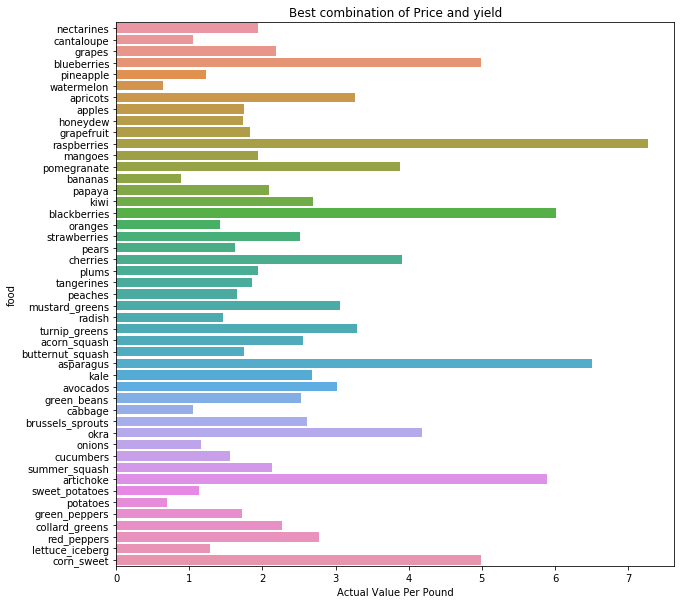

In [8]:
#create a new column "best_comb", which is "price_per_lb" divided by "yield"
all_data["best_comb"]=all_data["price_per_lb"]/all_data["yield"]
#get the food that has the smallest best_value, which is the food has the best combination
print(all_data["food"][all_data["best_comb"].idxmin()])

#plot actual value per pound vs food
plt.rcParams['figure.figsize'] = [10, 10]
sns.barplot(x="best_comb", y="food", data=all_data,ci=None)
plt.title('Best combination of Price and yield')
plt.xlabel("Actual Value Per Pound")